Coefficient Of Determination = 0.9397654251437261
[1.81255026e+03 4.29656801e+07]
[['India' '2022-03-02' 42938599 0]]


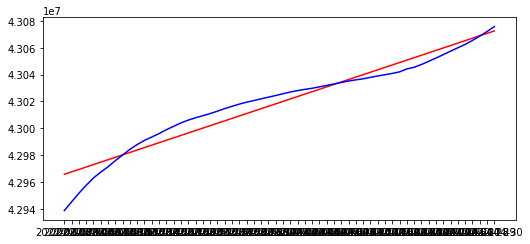

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

df = pd.read_csv('covid_data.csv')

cases=df[["Country","Date_reported","Cumulative_cases"]]

da=cases.loc[cases['Country'] == 'India']

da=da.loc[da['Date_reported'] > '2022-03-01']
da=da.loc[da['Date_reported'] < '2022-05-01']
x = range(0,60)
da['index']=x
#print(da)
arr = da.to_numpy()
axis= arr[:,1]
y = da["Cumulative_cases"]
X = da.iloc[:, 3].values.reshape(-1, 1)  # values converts it into a numpy array
Y = da.iloc[:, 2].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
r_sq=linear_regressor.score(X,Y)
print("Coefficient Of Determination =",r_sq)
Y_pred = linear_regressor.predict(X)  # make prediction
slope_intercept = np.polyfit(x,y,1)
print(slope_intercept)
print(da.iloc[:1].values)
plt.plot(axis, Y_pred, color='red')
plt.plot(axis,Y,color='blue')

plt.show()
